# Sistema de Detecção de Adulteração em Vinhos

## **1. Dataset e Contexto**

Utilizaremos o *dataset* **_Wine_**, o qual é formado por resultados de uma análise química de vinhos cultivados em uma mesma região na Itália, mas derivados de três cultivares diferentes. 

Ele é composto por *features* numéricas que descrevem componentes como álcool, ácido málico, cinzas, alcalinidade, magnésio, fenóis, flavonoides, entre outros. Além disso, é frequentemente usado para classificação de tipos de uva, análises de correlação química e modelagem de perfis de qualidade.

## **2. Aplicação e Problemática**

No mercado de vinhos de luxo, a fraude por mistura é um desafio. Vinhos de alta linhagem (*premium*) são frequentemente misturados com vinhos de menor custo para aumentar a margem de lucro, mantendo um perfil aceitável para consumidores leigos, mas alterando a integridade química do produto. Então, nosso objetivo com essa aplicação é **detectar a adulteração química nos vinhos**.

Este é um problema de **classificação multiclasse supervisionada multivariado**. Vamos abordá-lo de forma **paramétrica**, assumindo que as propriedades químicas de cada vinho seguem um padrão estatístico fixo.

O modelo será **preditivo** e **explicativo**: ele não apenas classifica a amostra e calcula a probabilidade de ela pertencer a cada classe, mas também permite entender exatamente como cada componente químico influencia a decisão do algoritmo.

Dessa forma, nosso foco está na **probabilidade**. Em vez de uma classificação puramente determinística, analisaremos a incerteza: vinhos que deixarem o modelo com muita dúvida sobre sua categoria serão sinalizados como possíveis fraudes.

## **3. Função Objetivo**

A função objetivo do nosso modelo é definida pela maximização da confiabilidade, usando a probabilidade calculada pelo modelo como um **score de autenticidade**. 

Na prática, buscamos configurar o modelo para que ele não apenas classifique o vinho, mas que opere com um limiar de corte (*threshold*). A função objetivo é otimizada para identificar e separar como suspeitas todas as amostras que não atinjam um nível mínimo de certeza matemática. 

Assim, a meta não é apenas a precisão, mas evitar "falsos positivos", garantindo que vinhos adulterados não sejam validados erroneamente como originais.

## **4. Entradas**

In [13]:
from sklearn.datasets import load_wine

wine = load_wine()
X, y = wine.data, wine.target

### **4.1 Sumário**

| **Feature (Variável)**   | **Unidade Padrão (Estimada)** | **Descrição Técnica & Significado**                                               |
| ------------------------ | ----------------------------- | --------------------------------------------------------------------------------- |
| **Alcohol**              | $\%$ vol (graus)              | Porcentagem de etanol por volume. Define o "corpo" do vinho.                      |
| **Malic Acid**           | $g/L$ (gramas/litro)          | Principal ácido orgânico. Afeta a acidez percebida (pH).                          |
| **Ash**                  | $g/L$                         | Resíduo mineral seco após incineração.                                            |
| **Alcalinity of Ash**    | $meq/L$                       | Miliequivalentes por litro. Medida da capacidade de neutralizar ácidos.           |
| **Magnesium**            | $mg/L$ (ppm)                  | Mineral essencial. Note a escala em miligramas (valor numérico alto).             |
| **Total Phenols**        | $g/L$ (GAE*)                  | Medida agregada de compostos fenólicos (antioxidantes).                           |
| **Flavanoids**           | $g/L$ (GAE*)                  | Subgrupo de fenóis. Altamente correlacionado com a qualidade da uva.              |
| **Nonflavanoid Phenols** | $g/L$ (GAE*)                  | Fenóis ácidos (ex: ácido gálico). Contribuem para o amargor.                      |
| **Proanthocyanins**      | $mg/L$                        | Taninos condensados. Responsáveis pela adstringência.                             |
| **Color Intensity**      | Absorbância ($A$)             | Soma das absorbâncias em comprimentos de onda específicos (ex: 420nm + 520nm).    |
| **Hue**                  | Adimensional ($\emptyset$)    | Razão entre absorbâncias (cor indica oxidação). Valores altos = alaranjado/velho. |
| **OD280/OD315**          | Adimensional ($\emptyset$)    | Razão de densidade óptica. Indica pureza proteica e diluição.                     |
| **Proline**              | $mg/L$                        | Aminoácido mais abundante. Principal diferenciador de maturação.                  |

In [14]:
import pandas as pd

df = pd.DataFrame(X, columns=wine.feature_names)
df["class"] = y

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### **4.2 Tipos e Valores Ausentes** 

| **Feature (Variável)**   | **Non-Null Count** | **Dtype** |
| ------------------------ | ------------------ | --------- |
| **Alcohol**              | 178 non-null       | float64   |
| **Malic Acid**           | 178 non-null       | float64   |
| **Ash**                  | 178 non-null       | float64   |
| **Alcalinity of Ash**    | 178 non-null       | float64   |
| **Magnesium**            | 178 non-null       | float64   |
| **Total Phenols**        | 178 non-null       | float64   |
| **Flavanoids**           | 178 non-null       | float64   |
| **Nonflavanoid Phenols** | 178 non-null       | float64   |
| **Proanthocyanins**      | 178 non-null       | float64   |
| **Color Intensity**      | 178 non-null       | float64   |
| **Hue**                  | 178 non-null       | float64   |
| **OD280/OD315**          | 178 non-null       | float64   |
| **Proline**              | 178 non-null       | float64   |
| **Class**                | 178 non-null       | int64     |

Portanto, conclui-se que o dataset já está **limpo** e não será preciso utilizar técnicas para o tratamento de valores ausentes. 

In [15]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class           

### **4.3 Análise de Algumas Métricas Sobre as Features**

Com a vizualização de algumas métricas sobre as features, é possivel enxergar uma grande **desproporção de escala** entre os valores de algumas variáveis, como entre as features **flavanoids** e **proline**. Desse modo, isso indica que teremos que utilizar alguma **técnica de escalonamento** na etapa de pré-processamento. Caso isso não seja feito, essa desproporção de escalas impactará de forma negativa na performance de certos algoritmos, como SVM e KNN, se tais sejam escolhidos.

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


### **4.4 Correlação Entre as Features**

<Axes: >

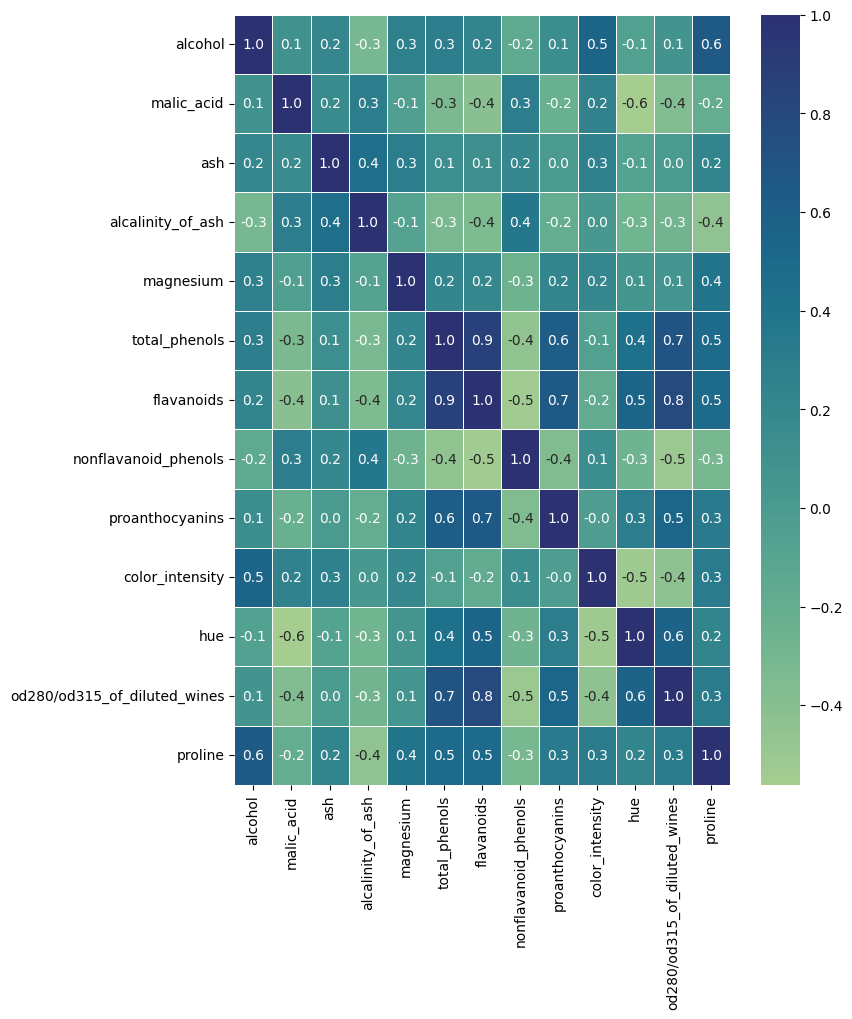

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.drop(columns="class").corr()

plt.figure(figsize=(8, 10))
sns.heatmap(corr, cmap="crest", annot=True, fmt=".1f", linewidths=0.5)

## **5. Pré-processamento**

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

preprocessing = Pipeline(
    [
        ("scaler", StandardScaler()),
    ]
)

## **6. Escolha do Modelo**

In [26]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

models = {
    "SVM": SVC(kernel="rbf", C=1.0, probability=True, random_state=42),
    "forest": RandomForestClassifier(random_state=42),
    "logistic_reg": LogisticRegressionCV(random_state=42, use_legacy_attributes=False, l1_ratios=[0.0],)
}

results = {}

# Loop de validação, é aplicado o cross-validation em cada um dos modelos, ao final é selecionado o modelo com maior acurácia
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessing", preprocessing),
        ("model", model)
    ])

    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    results[name] = {
        "mean_accuracy": cv_scores.mean(),
        "std_score": cv_scores.std(),
        "pipeline": pipeline
    }

    print(f"{name}: Accuracy: {cv_scores.mean()*100:.4f}%, Std: {cv_scores.std()*100:.4f}%")

best_model_name = max(results, key=lambda k: results[k]["mean_accuracy"])
model = results[best_model_name]["pipeline"]

print(f"O modelo escolhido através do cross-validation foi: {best_model_name}")

model.fit(X_train, y_train)

SVM: Accuracy: 98.6207%, Std: 2.7586%
forest: Accuracy: 98.6207%, Std: 2.7586%
logistic_reg: Accuracy: 98.6207%, Std: 2.7586%
O modelo escolhido através do cross-validation foi: SVM


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an excep

## **7. Métricas**

In [ ]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from typing import List, Tuple
import numpy as np


def get_metrics(model, X_test: np.ndarray, y_test: np.ndarray) -> Tuple[float, float, np.ndarray]:
    """
    Calcula métricas essenciais de classificação para avaliação do modelo.

    Esta função gera a acurácia, o log loss (para incerteza) e a matriz de confusão,
    permitindo uma visão da performance do classificador.
    """
    y_pred_prob = model.predict_proba(X_test)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    ll = log_loss(y_test, y_pred_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return acc, ll, conf_matrix


def is_adulterated(model, X_test: np.ndarray, treshold: float) -> List[bool]:
    """
    Identifica potenciais vinhos adulterados baseando-se na incerteza do modelo (Rejeição).

    Se a maior probabilidade predita pelo modelo para uma amostra for menor que o
    limiar (threshold) definido, a amostra é marcada como adulterada/desconhecida.
    """
    
    probs = model.predict_proba(X_test)

    max_probs = np.max(probs, axis=1)

    results = max_probs < treshold

    # Calcula a porcentagem de vinhos considerados adulterados
    n_rejeictions = np.sum(results)
    rejection_rate = n_rejeictions / len(results)

    return results, rejection_rate

acc: 97.22%
ll: 9.06%
rejection rate: 8.33%


<Axes: >

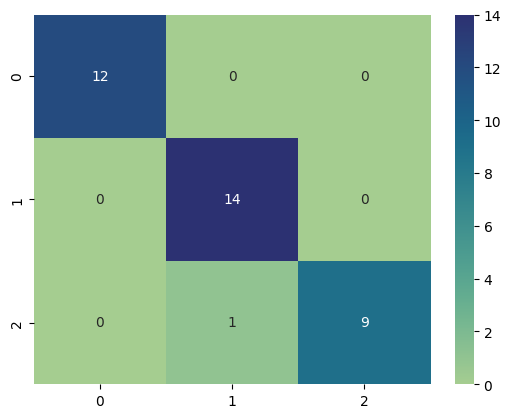

In [28]:
acc, ll, conf_matrix = get_metrics(model, X_test, y_test)

treshold = 0.8
results, rejection_rate = is_adulterated(model, X_test, treshold)

print(f"acc: {acc*100:.2f}%")
print(f"ll: {ll*100:.2f}%")
print(f"rejection rate: {rejection_rate*100:.2f}%")

sns.heatmap(conf_matrix, cmap="crest", annot=True)